In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/home/hp/DBDA/ML/machine-learning/Assignments/crime_data.csv')

In [3]:
df.head(5)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [6]:
df.rename(columns = {"Unnamed: 0": "names"}, inplace=True)

In [7]:
df.columns

Index(['names', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [15]:
df.drop(['names'], axis=1, inplace=True)

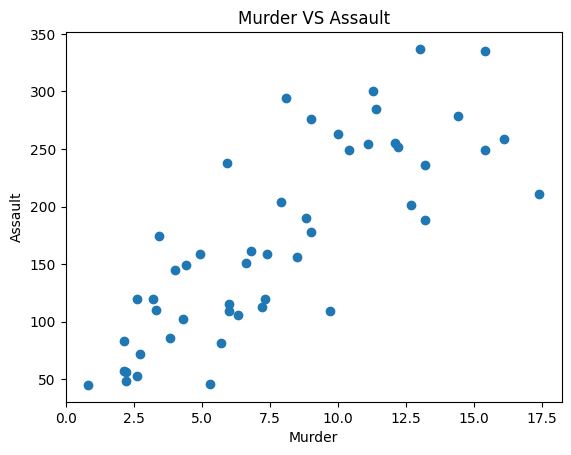

In [16]:
plt.scatter(df['Murder'],df['Assault'])
plt.title('Murder VS Assault')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.show()

In [17]:
from sklearn.cluster import KMeans

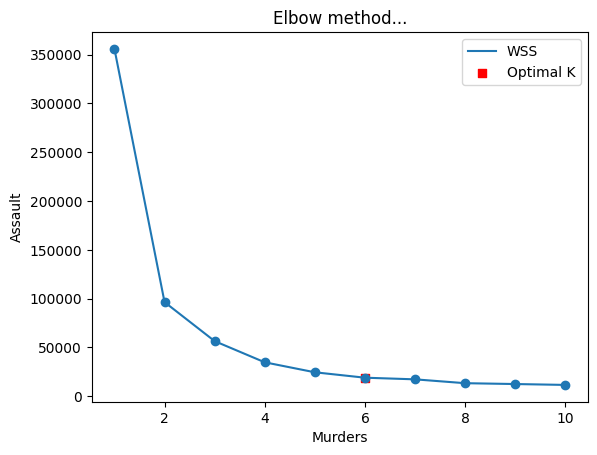

In [22]:
from sklearn.cluster import KMeans

num_of_clusters = np.arange(1,11)
wss = []
for k in num_of_clusters:
    kmeans = KMeans(n_clusters=k, random_state=123)
    kmeans.fit(df)
    wss.append(kmeans.inertia_)
    
#plot the graph
plt.plot(num_of_clusters, wss, label ='WSS')
plt.scatter(num_of_clusters[5],wss[5], color='red', label ='Optimal K', marker="s")
plt.scatter(num_of_clusters, wss)
plt.xlabel("Murders")
plt.ylabel("Assault")
plt.title('Elbow method...')
plt.legend()
plt.show()

In [23]:
kmeans = KMeans(n_clusters=4, random_state=12345)
kmeans.fit(df)

KMeans(n_clusters=4, random_state=12345)

In [24]:
kmeans.labels_

array([1, 1, 3, 0, 1, 1, 0, 1, 3, 1, 2, 0, 1, 0, 2, 0, 0, 1, 2, 3, 0, 1,
       2, 1, 0, 0, 0, 1, 2, 0, 3, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 0, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int32)

In [25]:
kmeans.cluster_centers_

array([[  6.32857143, 139.71428571,  67.95238095,  19.16666667],
       [ 11.8       , 242.07692308,  70.84615385,  29.43076923],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ],
       [ 12.26666667, 305.        ,  65.        ,  26.9       ]])

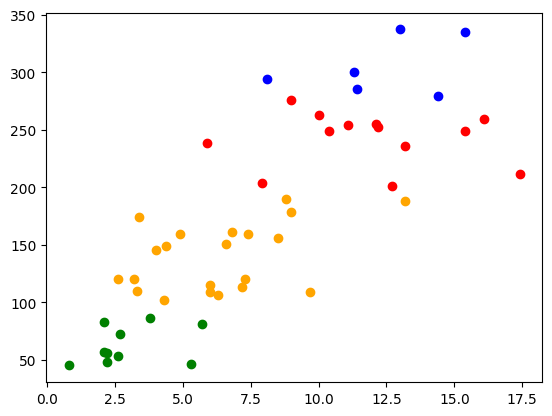

In [26]:
plt.scatter(df['Murder'][kmeans.labels_ ==0],df['Assault'][kmeans.labels_ ==0],color ='orange')

plt.scatter(df['Murder'][kmeans.labels_ ==1],df['Assault'][kmeans.labels_ ==1],color ='red')

plt.scatter(df['Murder'][kmeans.labels_ ==2],df['Assault'][kmeans.labels_ ==2],color ='green')

plt.scatter(df['Murder'][kmeans.labels_ ==3],df['Assault'][kmeans.labels_ ==3],color ='blue')


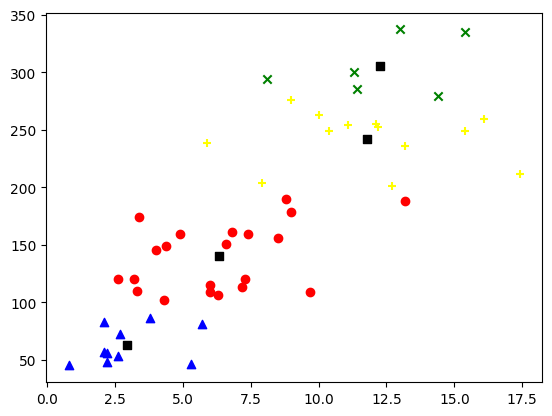

In [27]:
list = [('red',0,'o'),
       ('yellow',1,'+'),
        ('blue',2,'^'),
        ('green',3,'x')]

for color, index, marker in list:
    plt.scatter(df['Murder'][kmeans.labels_ == index],
               df['Assault'][kmeans.labels_ ==index],
               color = color, marker = marker)
    
for i in range(0,len(kmeans.cluster_centers_)):
      plt.scatter(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],color="black", marker="s")

plt.show()